# Portfolio 3 - Clustering Visualisation

K-means clustering is one of the simplest and popular unsupervised learning algorithms. Typically, unsupervised algorithms make inferences from datasets using only input vectors without referring to known, or labelled, outcomes. This notebook illustrates the process of K-means clustering by generating some random clusters of data and then showing the iterations of the algorithm as random cluster means are updated. 

We first generate random data around 4 centers.

In [1]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
from copy import deepcopy
%matplotlib inline

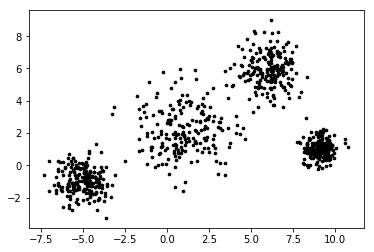

In [2]:
center_1 = np.array([1,2])
center_2 = np.array([6,6])
center_3 = np.array([9,1])
center_4 = np.array([-5,-1])

# Generate random data and center it to the four centers each with a different variance
np.random.seed(5)
data_1 = np.random.randn(200,2) * 1.5 + center_1
data_2 = np.random.randn(200,2) * 1 + center_2
data_3 = np.random.randn(200,2) * 0.5 + center_3
data_4 = np.random.randn(200,2) * 0.8 + center_4

data = np.concatenate((data_1, data_2, data_3, data_4), axis = 0)

plt.scatter(data[:,0], data[:,1], s=7, c='k')
plt.show()

## 1. Generate random cluster centres

Generate four random centres.

- The number of clusters `k` is set to 4;
- Generate random centres via `centres = np.random.randn(k,c)*std + mean` where `std` and `mean` are the standard deviation and mean of the data. `c` represents the number of features in the data. Set the random seed to 6.
- Color the generated centers with `green`, `blue`, `yellow`, and `cyan`. Set the edgecolors to `red`.

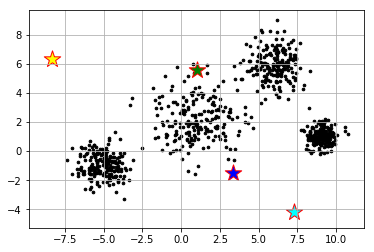

In [3]:
# number of clusters
k = 4
c = 2

# Generate random centers
np.random.seed(6)
mean = np.mean(data)
std = np.std(data)
centers = np.random.randn(k,c)*std + mean

# Plot data and the centers
plt.scatter(data[:,0], data[:,1], s=7, c='black')
plt.scatter(centers[0][0], centers[0][1], s=300, c='green',edgecolor='r', marker='*')
plt.scatter(centers[1][0], centers[1][1], s=300, c='blue', edgecolor='r',marker='*')
plt.scatter(centers[2][0], centers[2][1], s=300, c='yellow', edgecolor='r',marker='*')
plt.scatter(centers[3][0], centers[3][1], s=300, c='cyan',edgecolor='r', marker='*')
plt.grid()
plt.show()

In [4]:
print(centers)

[[ 1.0430169   5.53863665]
 [ 3.33061168 -1.4938254 ]
 [-8.35175241  6.33448312]
 [ 7.25803215 -4.15028729]]


## 2. Visualise the clustering results in each iteration

#### Implementation of k-means clustering

The basic algorithm is:
1. start with K randomly placed cluster centroids
2. for each data point, assign it to the closest cluster centroid
3. re-estimate the cluster centroids for each cluster based on the data points that belong to it
4. if the centroid estimate has not changed significantly, stop, otherwise repeat from step 2.

Each cell will show the iterative process of step 2 and step 3 in the k-means algorithm.

For each data point we need to compute the euclidean distance from the centroids and assign it to the closest cluster centroid. Then we continue to update the cluster centers based on the mean of the data. Steps 2 and 3 are repeated until the estimate does not change significantly.

For each iteration the clusters will be plot to demonstrate how the centroids are updated.

In [14]:
d = data.shape[0]
clusters = np.zeros(d) #create cluster array with shape of the data
distances = np.zeros((d,k)) #data + centroid
new_centers1 = deepcopy(centers) #copy of original centers

### Iteration 1

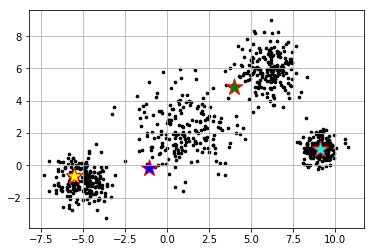

10.857280115563464


In [6]:
#For each data point assign to the closest centriod based on the distance
for i in range(k):
    distances[:,i] = np.linalg.norm(data - new_centers1[i], axis=1)
    #Assign data to closest centroid
    clusters = np.argmin(distances, axis = 1)
    
    #Calculate the mean for each cluster and then update the centroid position
for i in range(k):
    new_centers1[i] = np.mean(data[clusters == i], axis=0)
    
plt.scatter(data[:,0], data[:,1], s=7, c='black')
plt.scatter(new_centers1[0][0], new_centers1[0][1], s=300, c='green',edgecolor='r', marker='*')
plt.scatter(new_centers1[1][0], new_centers1[1][1], s=300, c='blue', edgecolor='r',marker='*')
plt.scatter(new_centers1[2][0], new_centers1[2][1], s=300, c='yellow', edgecolor='r',marker='*')
plt.scatter(new_centers1[3][0], new_centers1[3][1], s=300, c='cyan',edgecolor='r', marker='*')
plt.grid()
plt.show()

#new center distance - old center distance
print(np.linalg.norm(new_centers1 - centers))

With the first iteration we can see that there is quite a big difference in distance from the old centroid position to the new centroid position.

### Iteration 2

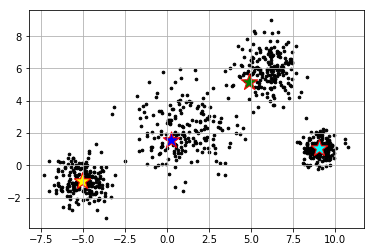

2.416019654594248


In [7]:
new_centers2 = (deepcopy(new_centers1)) #copy of previous centers

for i in range(k):
    distances[:,i] = np.linalg.norm(data - new_centers2[i], axis=1)
    # Assign data to closest centroid
    clusters = np.argmin(distances, axis = 1)
    
    #Calculate the mean for each cluster and then update the centroid position
for i in range(k):
    new_centers2[i] = np.mean(data[clusters == i], axis=0)

plt.scatter(data[:,0], data[:,1], s=7, c='black')
plt.scatter(new_centers2[0][0], new_centers2[0][1], s=300, c='green',edgecolor='r', marker='*')
plt.scatter(new_centers2[1][0], new_centers2[1][1], s=300, c='blue', edgecolor='r',marker='*')
plt.scatter(new_centers2[2][0], new_centers2[2][1], s=300, c='yellow', edgecolor='r',marker='*')
plt.scatter(new_centers2[3][0], new_centers2[3][1], s=300, c='cyan',edgecolor='r', marker='*')
plt.grid()
plt.show()

#new center distance - old center distance
print(np.linalg.norm(new_centers2 - new_centers1))

### Iteration 3

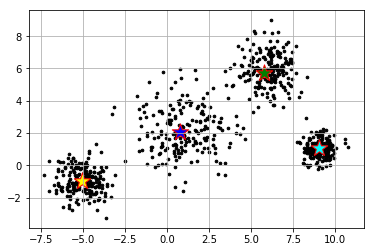

1.2581353131267674


In [8]:
new_centers3 = (deepcopy(new_centers2)) #copy of previous centers

for i in range(k):
    distances[:,i] = np.linalg.norm(data - new_centers3[i], axis=1)
    # Assign data to closest centroid
    clusters = np.argmin(distances, axis = 1)
    
    #Calculate the mean for each cluster and then update the centroid position
for i in range(k):
    new_centers3[i] = np.mean(data[clusters == i], axis=0)
    
plt.scatter(data[:,0], data[:,1], s=7, c='black')
plt.scatter(new_centers3[0][0], new_centers3[0][1], s=300, c='green',edgecolor='r', marker='*')
plt.scatter(new_centers3[1][0], new_centers3[1][1], s=300, c='blue', edgecolor='r',marker='*')
plt.scatter(new_centers3[2][0], new_centers3[2][1], s=300, c='yellow', edgecolor='r',marker='*')
plt.scatter(new_centers3[3][0], new_centers3[3][1], s=300, c='cyan',edgecolor='r', marker='*')
plt.grid()
plt.show()

#new center distance - old center distance
print(np.linalg.norm(new_centers3 - new_centers2))

### Iteration 4

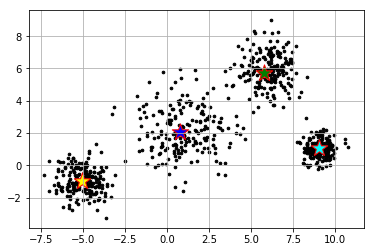

0.33470387300034415


In [9]:
new_centers4 = (deepcopy(new_centers3)) #copy of previous centers

for i in range(k):
    distances[:,i] = np.linalg.norm(data - new_centers4[i], axis=1)
    # Assign data to closest centroid
    clusters = np.argmin(distances, axis = 1)
    
    #Calculate the mean for each cluster and then update the centroid position
for i in range(k):
    new_centers3[i] = np.mean(data[clusters == i], axis=0)
    
plt.scatter(data[:,0], data[:,1], s=7, c='black')
plt.scatter(new_centers4[0][0], new_centers4[0][1], s=300, c='green',edgecolor='r', marker='*')
plt.scatter(new_centers4[1][0], new_centers4[1][1], s=300, c='blue', edgecolor='r',marker='*')
plt.scatter(new_centers4[2][0], new_centers4[2][1], s=300, c='yellow', edgecolor='r',marker='*')
plt.scatter(new_centers4[3][0], new_centers4[3][1], s=300, c='cyan',edgecolor='r', marker='*')
plt.grid()
plt.show()

#new center distance - old center distance
print(np.linalg.norm(new_centers4 - new_centers3))

### Iteration 5

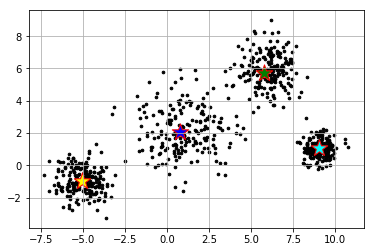

0.0


In [10]:
new_centers5 = (deepcopy(new_centers4)) #copy of previous centers

for i in range(k):
    distances[:,i] = np.linalg.norm(data - new_centers5[i], axis=1)
    # Assign data to closest centroid
    clusters = np.argmin(distances, axis = 1)
    
    #Calculate the mean for each cluster and then update the centroid position
for i in range(k):
    new_centers3[i] = np.mean(data[clusters == i], axis=0)
    
plt.scatter(data[:,0], data[:,1], s=7, c='black')
plt.scatter(new_centers5[0][0], new_centers5[0][1], s=300, c='green',edgecolor='r', marker='*')
plt.scatter(new_centers5[1][0], new_centers5[1][1], s=300, c='blue', edgecolor='r',marker='*')
plt.scatter(new_centers5[2][0], new_centers5[2][1], s=300, c='yellow', edgecolor='r',marker='*')
plt.scatter(new_centers5[3][0], new_centers5[3][1], s=300, c='cyan',edgecolor='r', marker='*')
plt.grid()
plt.show()

#new center distance - old center distance
print(np.linalg.norm(new_centers5 - new_centers4))

By the 5th iteration, the difference between the older center and the newer center is now 0.0

The centroid has not changed since the last iteration therefore we can stop the algorithm.